In [1]:
import os
path = os.path.abspath(os.path.join('..','..'))
import sys
sys.path.append(path)
from reservoirpy.pvtpy import black_oil as bo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
o = bo.oil(formation='mir',api=31,rsb=675,sg_gas=0.95,temp=180,bg=np.full(20,0.00123))

In [3]:
np.full(20,0.00123)

array([0.00123, 0.00123, 0.00123, 0.00123, 0.00123, 0.00123, 0.00123,
       0.00123, 0.00123, 0.00123, 0.00123, 0.00123, 0.00123, 0.00123,
       0.00123, 0.00123, 0.00123, 0.00123, 0.00123, 0.00123])

In [4]:
o.pvt_from_correlations()

[2.65452674]
[654.01233006]
                     rs        bo        co  muo       rhoo
pressure                                                   
20.000000      5.326543  1.058035  0.021416  0.0  51.360005
282.105263    53.284908  1.079890  0.000461  0.0  50.842386
544.210526   111.968851  1.107707  0.000178  0.0  50.179542
806.315789   176.660518  1.139550  0.000101  0.0  49.424712
1068.421053  245.733349  1.174729  0.000067  0.0  48.603208
1330.526316  318.311455  1.212849  0.000049  0.0  47.733152
1592.631579  393.837219  1.253634  0.000038  0.0  46.828757
1854.736842  471.920759  1.296878  0.000030  0.0  45.901465
2116.842105  552.272383  1.342417  0.000025  0.0  44.960546
2378.947368  634.667425  1.390115  0.000021  0.0  44.013493
2641.052632  674.929091  1.413767  0.000016  0.0  43.681374
2903.157895  674.929091  1.413767  0.000015  0.0  43.520553
3165.263158  674.929091  1.413767  0.000014  0.0  43.386820
3427.368421  674.929091  1.413767  0.000013  0.0  43.273862
3689.473684 

,rs,bo,co,muo,rhoo
pressure,,,,,
20.000000,5.326543,1.058035,0.021416,0.0,51.360005
282.105263,53.284908,1.079890,0.000461,0.0,50.842386
544.210526,111.968851,1.107707,0.000178,0.0,50.179542
806.315789,176.660518,1.139550,0.000101,0.0,49.424712
1068.421053,245.733349,1.174729,0.000067,0.0,48.603208
1330.526316,318.311455,1.212849,0.000049,0.0,47.733152
1592.631579,393.837219,1.253634,0.000038,0.0,46.828757
1854.736842,471.920759,1.296878,0.000030,0.0,45.901465
2116.842105,552.272383,1.342417,0.000025,0.0,44.960546


In [5]:
o.pvt.set_interpolators()

In [6]:
o.pvt.rs_int(2000)

array(516.45298452)

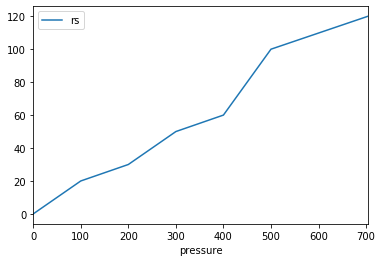

In [7]:
d = {'pressure':[0,100,200,300,400,500,704],'rs':[0,20,30,50,60,100,120]}
p = bo.oil_pvt(d)
p.plot()

In [8]:
rs=675
api=31
sg_gas=0.95
temp = 180
y_co2 = 0.2
y_h2s = 0.1
pb = 1800
p = 2000
bg = 0.00123 #by/pcn

In [9]:
pb_cor = bo.pb(rs=rs,
               temp=temp,
               sg_gas=sg_gas,
               api=api,
               y_co2=y_co2,
               y_h2s=y_h2s,
               multiple=False,
               correction=True,
               methods=['standing'])
pb_cor

,pb
temp,
180,2174.376878


In [10]:
rs_cor=bo.rs(p=p,
             temp=temp,
             sg_gas=sg_gas,
             api=api,
             pb=pb,
             multiple=True,
             methods=['standing','laster','glaso','vazquez_beggs'])
rs_cor

,rs
pressure,
2000,455.418283


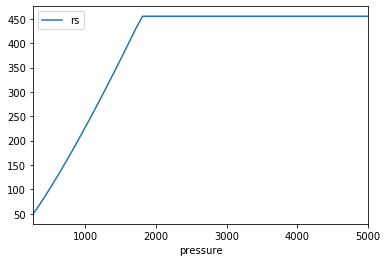

In [11]:
_p = np.linspace(264,5000,50)
rs_cor=bo.rs(p=_p,
             temp=temp,
             sg_gas=sg_gas,
             api=api,
             pb=pb, 
             rsb=450,
             multiple=False,
             methods=['standing'])
rs_cor.plot()

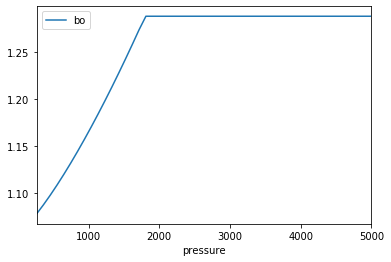

In [12]:
bo_cor=bo.bo(p=_p,
             rs=rs_cor['rs'].values,
             temp=temp,
             sg_gas=sg_gas,
             api=api,
             pb=pb,
             multiple=False,
             methods=['glaso'])
bo_cor.plot()

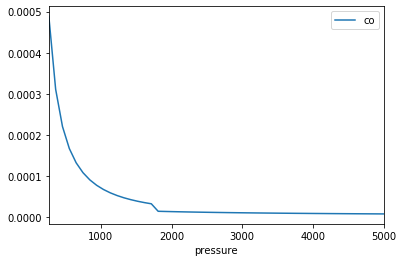

In [13]:
co_cor=bo.co(p=_p, 
             rs=rs_cor['rs'].values, 
             temp=temp, 
             pb=pb, 
             sg_gas=sg_gas, 
             api=api,
             bo=bo_cor['bo'],
             bg=np.full(_p.shape,bg), 
             method_above_pb='petrosky', 
             method_below_pb='mccain')
co_cor.plot()

In [14]:
help(bo.co)

Help on function co in module reservoirpy.pvtpy.black_oil.correlations:

co(p=None, rs=None, pb=None, temp=None, sg_gas=None, api=None, bo=None, bg=None, method_above_pb='vazquez_beggs', method_below_pb='mccain', **kwargs)
    Estimate the Oil compresibility in 1/psi
    
    Input: 
        p -> (int,float,list,np.array) Interest Pressure [psi]
        rs -> (int,float,np.array) Gas Oil Ratio scf/bbl
        pb -> (int,float,np.array) Bubble Point [psi]
        temp ->  (int,float,np.array) Temperature [F]
        sg_gas -> (int,float,np.array) Gas specifi gravity
        api -> (int,float,np.array) Oil API gravity [API]
        bo -> (list,np.array) Oil Volumetric factor
        bg -> (list,np.array) Oil Volumetric factor
        method_above_pb -> (list, default 'vazquez_beggs') method to use above the bubble point
                            ['vazquez_beggs','petrosky','kartoatmodjo']
        method_below_pb -> (list, default 'mccain') method to use below the bubble point
         

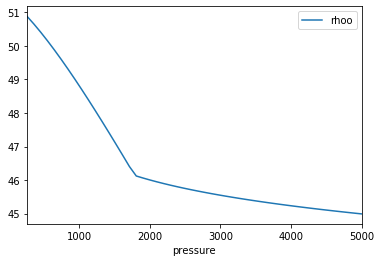

In [15]:
rho_cor=bo.rho_oil(p=_p,
                   co=co_cor['co'].values,
                   bo=bo_cor['bo'].values,
                   rs=rs_cor['rs'].values,
                   api=api,
                   pb=pb)
rho_cor.plot()

In [16]:
_muod = bo.muod(temp=temp,api=api, multiple=True,methods=['beal','beggs','glaso'])
_muod

,muod
temp,
180,2.654527


[2.65452674]
[452.63086431]


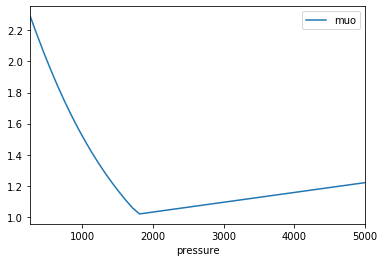

In [20]:
muo_cor=bo.muo(p=_p,
    rs=rs_cor['rs'].values,
    temp=temp,
    api=api,
    pb=pb,
    method_below_pb='chew',
    method_above_pb='beal',
    method_dead = 'glaso'
    )

muo_cor.plot()

In [18]:
h=None
g=type(h)
isinstance(h,type(None))

True

In [19]:
g

NoneType